# 01_build_dataset.ipynb

**Objective:**  
1. Mount your Drive and point to the training folder  
2. Verify you have “brutalist/”, “colonial/”, “gothic/” sub-folders  
3. Count images per class and assert minimum count  
4. Build a `metadata.csv` for downstream pipelines  
5. Display a couple of example images per class  


In [2]:
# Cell Tag: parameters
# 1. Mount Google Drive and cd into your dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
# Adjust this path if needed
DATA_ROOT = "/content/drive/My Drive/Colab Notebooks/CPSC 381-581: Machine Learning/Final Project/data/train"
os.chdir(DATA_ROOT)
print("Current working dir:", os.getcwd())


Mounted at /content/drive
Current working dir: /content/drive/My Drive/Colab Notebooks/CPSC 381-581: Machine Learning/Final Project/data/train


In [6]:
# Cell Tag: explore
# 2. List class directories and counts
classes = [d for d in os.listdir(DATA_ROOT) if os.path.isdir(d)]
print("Found classes:", classes)

img_counts = {}
for cls in classes:
    files = [f for f in os.listdir(os.path.join(DATA_ROOT, cls)) if f.lower().endswith(('.jpg','.png','.jpeg'))]
    img_counts[cls] = len(files)

print("Image counts per class:")
for cls, cnt in img_counts.items():
    print(f"  {cls:10s}: {cnt}")

# Quick sanity check
MIN_PER_CLASS = 30
for cls, cnt in img_counts.items():
    assert cnt >= MIN_PER_CLASS, f"Need at least {MIN_PER_CLASS} images for {cls}, found {cnt}"


Found classes: ['Brutalist architecture', 'Colonial architecture', 'Gothic architecture']
Image counts per class:
  Brutalist architecture: 256
  Colonial architecture: 480
  Gothic architecture: 331


In [7]:
# Cell Tag: build-metadata
# 3. Build metadata.csv
import csv
metadata_path = os.path.join("..","metadata.csv")  # will write one level up
with open(metadata_path, "w", newline="") as cf:
    writer = csv.writer(cf)
    writer.writerow(["split","label","filepath"])
    for label in classes:
        class_dir = os.path.join(DATA_ROOT, label)
        for fname in os.listdir(class_dir):
            if fname.lower().endswith(('.jpg','.png','.jpeg')):
                writer.writerow(["train", label, os.path.join(class_dir, fname)])
print("Wrote metadata to", metadata_path)

Wrote metadata to ../metadata.csv


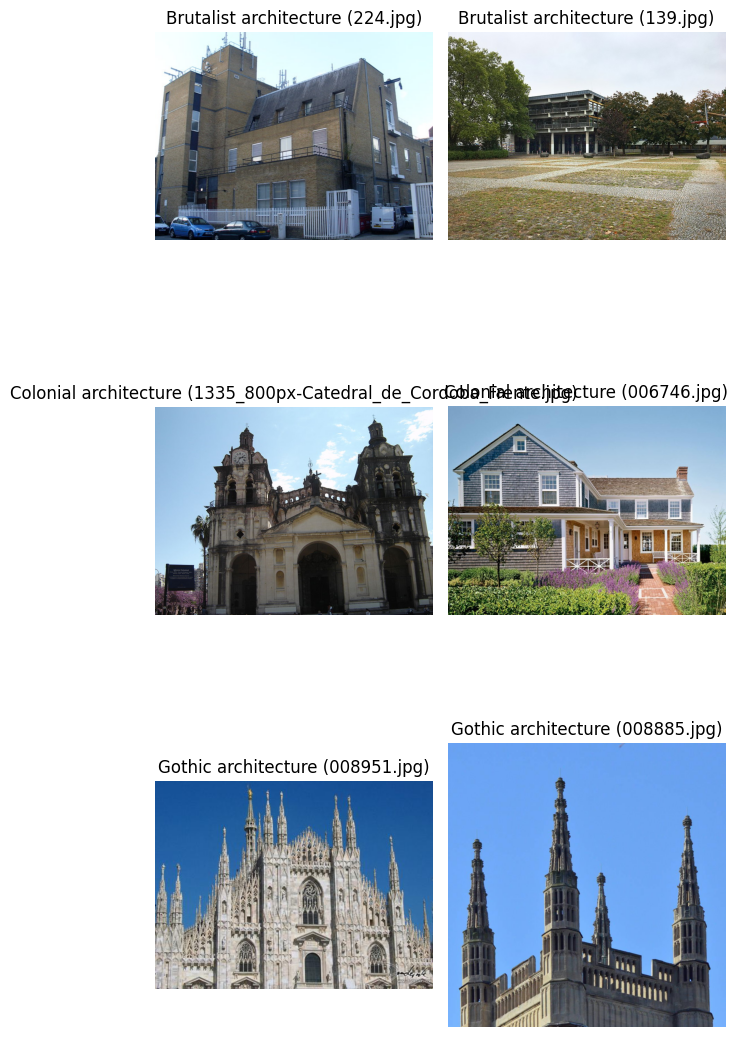

In [8]:
# Cell Tag: preview
# 4. Preview 2 random images per class
import random
from matplotlib import pyplot as plt
from PIL import Image

random.seed(42)
fig, axes = plt.subplots(len(classes), 2, figsize=(6, 4*len(classes)))
for i, label in enumerate(classes):
    img_files = [f for f in os.listdir(os.path.join(DATA_ROOT, label))
                 if f.lower().endswith(('.jpg','.png','.jpeg'))]
    samples = random.sample(img_files, 2)
    for j, fname in enumerate(samples):
        img = Image.open(os.path.join(DATA_ROOT, label, fname))
        axes[i, j].imshow(img)
        axes[i, j].axis("off")
        axes[i, j].set_title(f"{label} ({fname})")
plt.tight_layout()
